Terrorism is the major problem faced worldwide today. Even there are various reasons behind a terrorist attack, the lives a innocent people are at stake. It is those innocent people who die first who dont have anything to do with the motive of the terrorists. 

Terrorism should be erradicated completely from the society at all levels. Even terrorists have their version of story, it should be told at the right place. Killing innocent people will bring no good to them.

Lets analyse the dataset that contains the terroist attacks that happened worldwide.

In [2]:
# importing all the necessary packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the dataset
terror=pd.read_csv('gtd/globalterrorismdb_0617dist.csv', encoding='ISO-8859-1')

In [4]:
# Preview the raw dataset
terror.head ()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
# Renaming the features
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
# Retaining only usefull features
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
# Preview the cleaned dataset
terror.head ()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
# Creating new feature "Casualities" by adding "Killed" and "Wounded" features
terror['casualities']=terror['Killed']+terror['Wounded']

In [9]:
terror.head (3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [10]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              446
latitude         4606
longitude        4606
AttackType          0
Killed           9682
Wounded         15325
Target            636
Summary         66138
Group               0
Target_type         0
Weapon_type         0
Motive         121764
casualities     15826
dtype: int64

In [11]:
terror['Group'].value_counts().head (5)

Unknown                                             78306
Taliban                                              6575
Shining Path (SL)                                    4551
Islamic State of Iraq and the Levant (ISIL)          4287
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Group, dtype: int64

In [12]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)
print('Maximum casualties of', terror['casualities'].max(), 'happened in a single attack in', terror.loc[terror['casualities'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1500.0 that took place in Iraq
Maximum casualties of 8749.0 happened in a single attack in United States


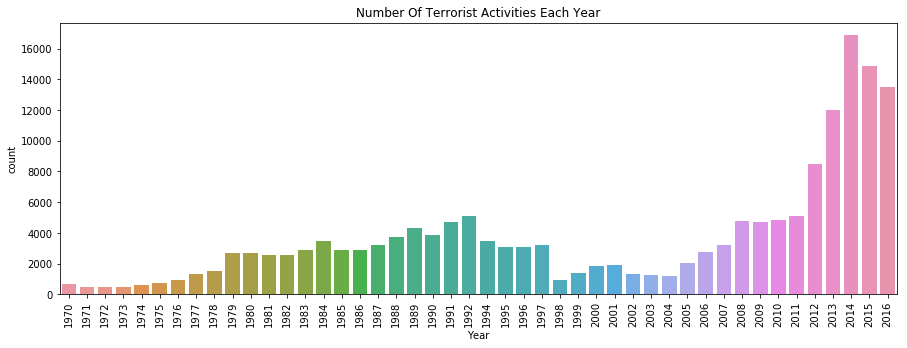

In [13]:
plt.subplots(figsize=(15,5))
sns.countplot('Year',data=terror)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

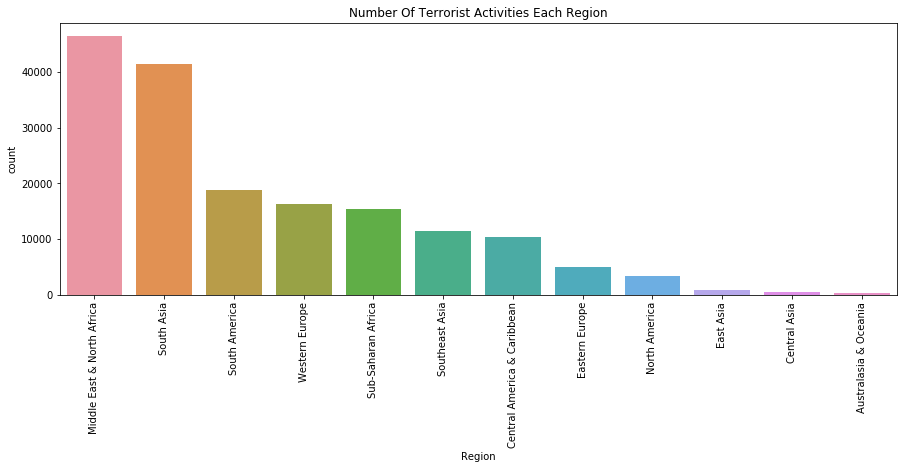

In [14]:
plt.subplots(figsize=(15,5))
sns.countplot('Region',data=terror,order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Region')
plt.show()

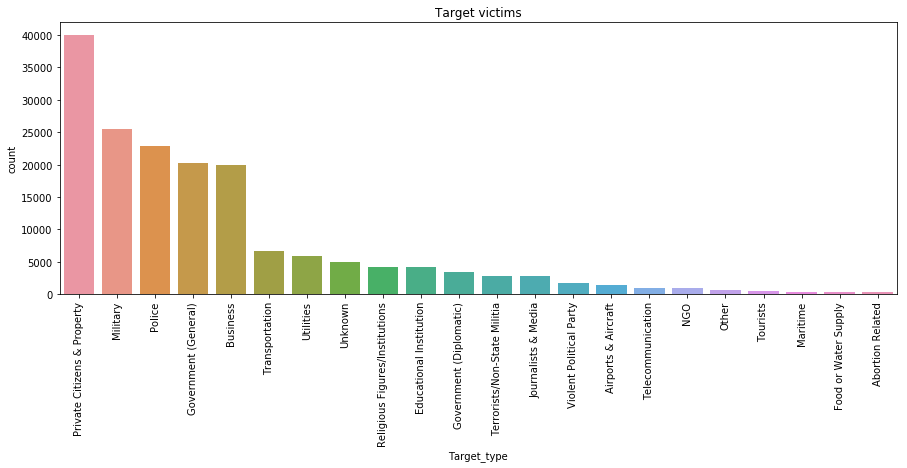

In [15]:
plt.subplots(figsize=(15,5))
sns.countplot('Target_type',data=terror,order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Target victims')
plt.show()

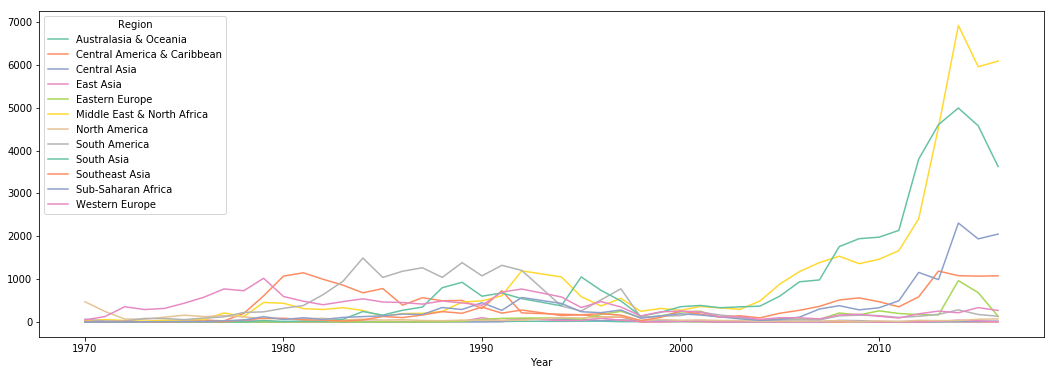

In [16]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [17]:
terror_type = pd.crosstab(terror.Region,terror.AttackType)
terror_type

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Region,,,,,,,,,
Australasia & Oceania,49,30,73,67,3,5,11,10,16
Central America & Caribbean,4360,1253,3239,401,26,187,501,19,354
Central Asia,115,114,231,19,8,2,45,4,16
East Asia,114,55,327,198,18,3,14,42,23
Eastern Europe,1254,386,2720,239,26,20,216,57,113
Middle East & North Africa,8740,4060,28314,1049,126,87,2417,164,1554
North America,406,237,1528,872,18,63,121,69,32
South America,3824,2713,8977,776,66,229,1378,47,752
South Asia,10604,3967,19834,1898,85,100,3002,279,1728


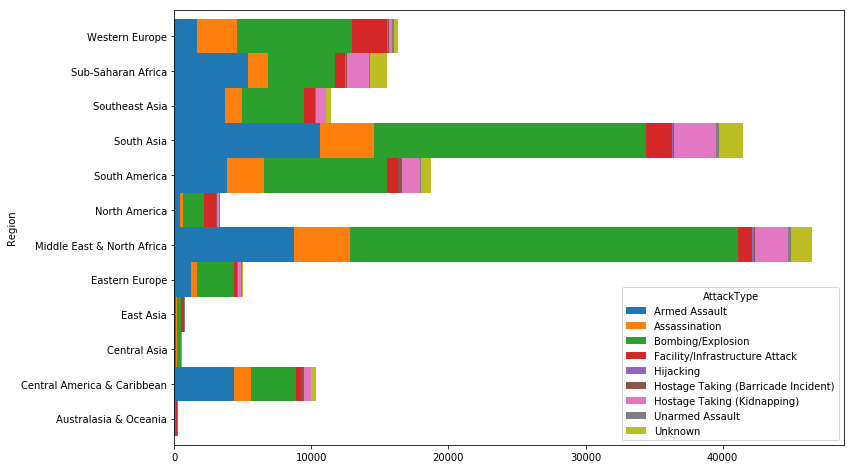

In [18]:
terror_type.plot.barh(stacked=True, width=1)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [19]:
# Top 20 countries affected by terrorism
coun_terror=terror['Country'].value_counts()[:20].to_frame() # to_frame() function will generate a dataframe out of the results. 
coun_terror.columns=['Attacks']
coun_terror.head()

,Attacks
Iraq,22130
Pakistan,13634
Afghanistan,11306
India,10978
Colombia,8163


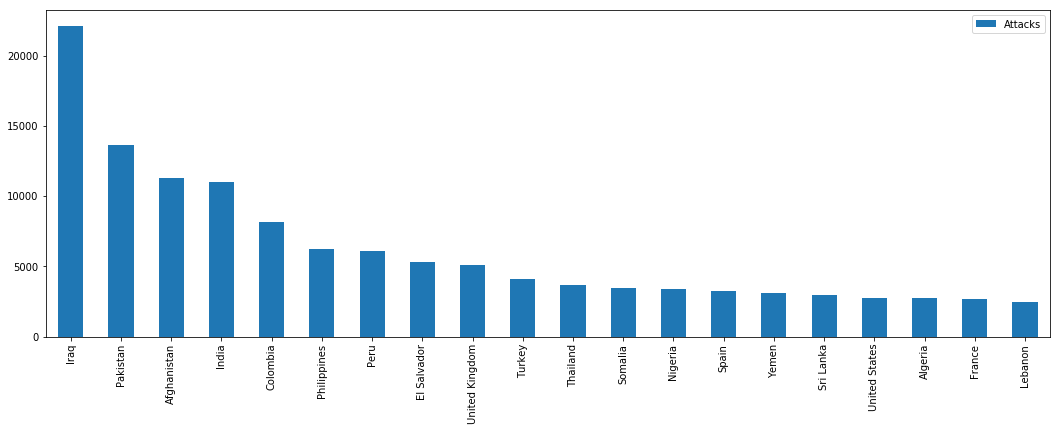

In [20]:
coun_terror.plot.bar()
fig=plt.gcf()
fig.set_size_inches(18,6)

In [21]:
# This will give the number of people killed in every country collectively
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame() 
coun_kill.head ()

,Killed
Country,
Afghanistan,33146.0
Albania,42.0
Algeria,11091.0
Andorra,0.0
Angola,3036.0


In [22]:
# This will merge the coun_terror and coun_kill datasets 
# and give top 20 countries with no of attacks and no of people killed 
attack_kill = coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left')
attack_kill

,Attacks,Killed
Iraq,22130,71082.0
Pakistan,13634,22734.0
Afghanistan,11306,33146.0
India,10978,18842.0
Colombia,8163,14600.0
Philippines,6212,9058.0
Peru,6088,12763.0
El Salvador,5320,12053.0
United Kingdom,5098,3367.0
Turkey,4106,6664.0


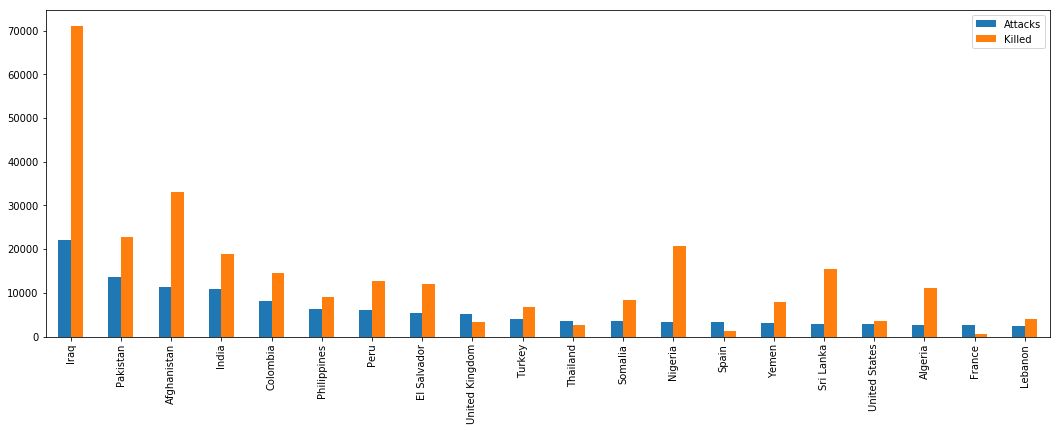

In [23]:
# Plotting the same on a bar chart
attack_kill.plot.bar()
fig=plt.gcf()
fig.set_size_inches(18,6)

In [24]:
# To find which terrorist group is most active
coun_group=terror['Group'].value_counts()[:20].to_frame()
coun_group

,Group
Unknown,78306
Taliban,6575
Shining Path (SL),4551
Islamic State of Iraq and the Levant (ISIL),4287
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,2683
Irish Republican Army (IRA),2669
Revolutionary Armed Forces of Colombia (FARC),2481
New People's Army (NPA),2414
Kurdistan Workers' Party (PKK),2152


Text(0.5,1,'Most active terrorist groups')

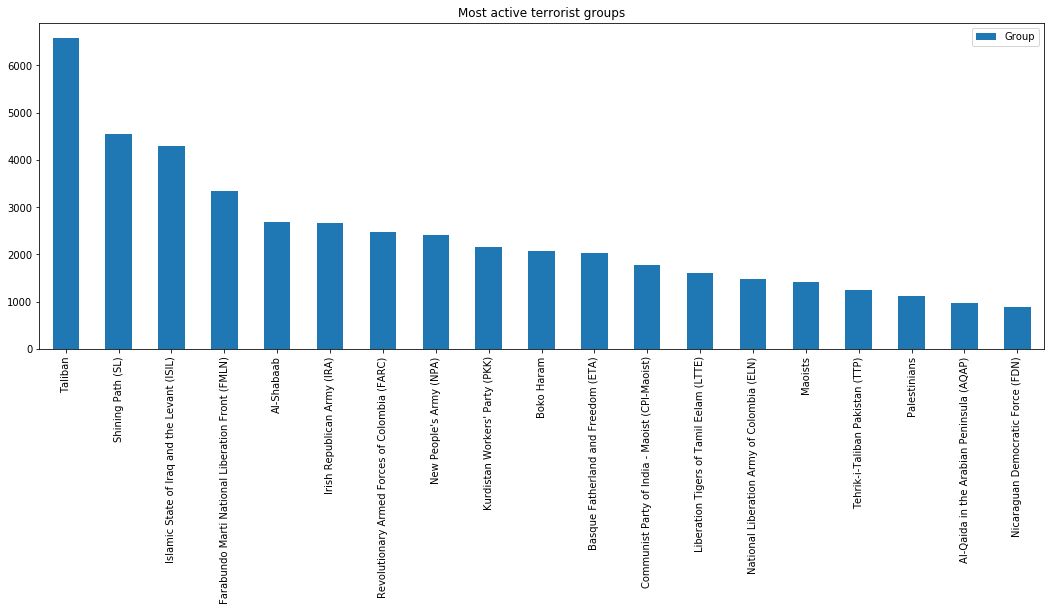

In [25]:
coun_group[1:20].plot.bar()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title ("Most active terrorist groups")

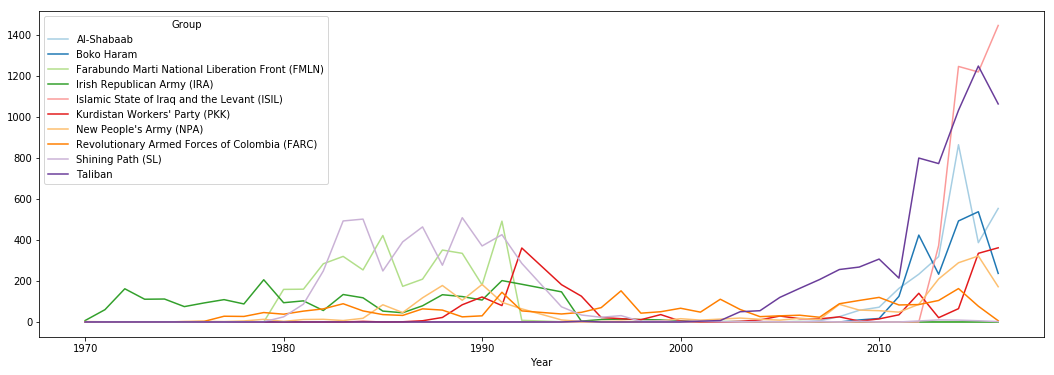

In [26]:
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
noto_gro = pd.crosstab(top_groups10.Year,top_groups10.Group)
noto_gro.plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

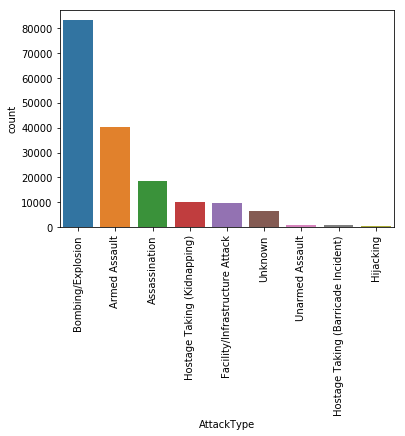

In [27]:
# Favorite attacking style world wide
sns.countplot(terror['AttackType'], order = terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)

In [28]:
terror_india=terror[terror['Country']=='India']

In [29]:
terror_india.head ()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
1185,1972,2,22,India,South Asia,New Delhi,28.632381,77.220004,Hijacking,0.0,0.0,B-747,NaN,Palestinians,Airports & Aircraft,Explosives/Bombs/Dynamite,NaN,0.0
2690,1975,1,2,India,South Asia,Samastipur,25.863042,85.781004,Bombing/Explosion,4.0,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives/Bombs/Dynamite,Unknown,4.0
3782,1976,5,26,India,South Asia,New Delhi,28.632381,77.220004,Bombing/Explosion,0.0,0.0,New Delhi airport,NaN,Unknown,Airports & Aircraft,Explosives/Bombs/Dynamite,NaN,0.0
5253,1977,9,28,India,South Asia,Bombay,19.075984,72.877656,Hijacking,0.0,0.0,DC-8,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,0.0
7263,1979,1,13,India,South Asia,Unknown,26.200605,92.937574,Armed Assault,NaN,NaN,patrol,NaN,Naga People,Police,Firearms,NaN,NaN
